In [1]:
# 导包
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_path = "./"

In [3]:
print(os.listdir(train_path))

['.ipynb_checkpoints', 'data', 'graphviz.ipynb', 'GRU.h5', 'GRU=数据0在第一位-修改0712.ipynb', 'GRU=数据0在第一位.ipynb', 'GRU=数据1在第一位.ipynb', 'GRU=数据2在第一位.ipynb', 'GRU=数据3在第一位.ipynb', 'GRU=数据4在第一位.ipynb', 'GRU=数据5在第一位.ipynb', 'GRU=数据6在第一位.ipynb', 'GRU=数据7在第一位.ipynb', 'GRU=数据8在第一位.ipynb', 'GRU=数据9在第一位 - 副本.ipynb', 'GRU=数据9在第一位.ipynb', 'model.h5', 'modelnew.h5', 'Untitled.ipynb']


In [4]:
# 读取文件
#data = pd.read_csv("GPSALL.csv")
#data = pd.read_csv("data/GENEGPS64ALLALL.csv")
data = pd.read_csv("data/SMOTE数据拆分/0在第一位.csv")
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.000000,2.5,11.0,2176.0,4.388254e+08,6287.800000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.10000,3145920.0,-3.460000,2.110000,0.0,0.0,1
1,161.000000,1.0,31.0,2190.0,2.897808e+08,1422.400000,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.00000,3145920.0,1.500000,-1.530000,0.0,0.0,0
2,37.000000,1.0,31.0,2190.0,2.899128e+08,1554.400000,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.20000,3145920.0,2.330000,-1.540000,0.0,0.0,0
3,170.000000,2.5,11.0,2176.0,4.388384e+08,6300.800000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.50000,3145920.0,-3.500000,2.470000,0.0,0.0,1
4,124.000000,1.0,31.0,2190.0,2.897436e+08,1385.200000,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.30000,3145920.0,2.430000,-1.390000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,183.000000,1.0,31.0,2190.0,2.905708e+08,2212.400000,0.0,50.0,30.0,24.0,...,1.0,64.0,0.0,179.90000,3145920.0,5.520000,-4.590000,0.0,0.0,0
13824,178.000000,5.0,16.0,2176.0,4.394892e+08,398.000000,13.0,16.0,46.0,24.7,...,1.0,64.0,0.0,28.70000,3145920.0,4.800000,4.870000,0.0,0.0,1
13825,36.000000,1.0,30.0,2190.0,2.904238e+08,2065.400000,0.0,50.0,30.0,23.6,...,1.0,64.0,0.0,178.30000,3145920.0,1.690000,-3.130000,0.0,0.0,0
13826,73.160701,5.0,10.0,2176.0,4.383846e+08,5846.960701,13.0,16.0,35.0,24.8,...,1.0,64.0,0.0,9.03404,3145920.0,-1.043389,1.431249,0.0,0.0,1


In [5]:
# 查看前5行数据
data.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.0,2.5,11.0,2176.0,438825400.0,6287.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.1,3145920.0,-3.46,2.11,0.0,0.0,1
1,161.0,1.0,31.0,2190.0,289780800.0,1422.4,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.0,3145920.0,1.50,-1.53,0.0,0.0,0
2,37.0,1.0,31.0,2190.0,289912800.0,1554.4,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.2,3145920.0,2.33,-1.54,0.0,0.0,0
3,170.0,2.5,11.0,2176.0,438838400.0,6300.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.5,3145920.0,-3.50,2.47,0.0,0.0,1
4,124.0,1.0,31.0,2190.0,289743600.0,1385.2,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.3,3145920.0,2.43,-1.39,0.0,0.0,0


In [6]:
data.index

RangeIndex(start=0, stop=13828, step=1)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count           13828 non-null  float64
 1   gpsPdop         13828 non-null  float64
 2   gpsNumSv        13828 non-null  float64
 3   gpsWeek         13828 non-null  float64
 4   itow            13828 non-null  float64
 5   gpsSec          13828 non-null  float64
 6   P_Sol_Status    13828 non-null  float64
 7   Pos_Type        13828 non-null  float64
 8   AvionicsTemp    13828 non-null  float64
 9   MainPowerV      13828 non-null  float64
 10  ServPowerV      13828 non-null  float64
 11  powerV          13828 non-null  float64
 12  APGlobalStatus  13828 non-null  float64
 13  GPSStatus       13828 non-null  float64
 14  mpStatus        13828 non-null  float64
 15  cmd             13828 non-null  float64
 16  Lat             13828 non-null  float64
 17  Lon             13828 non-null 

In [8]:
# 去除缺失数据
data.dropna(axis=0, how='any', inplace=True)

In [9]:
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.000000,2.5,11.0,2176.0,4.388254e+08,6287.800000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.10000,3145920.0,-3.460000,2.110000,0.0,0.0,1
1,161.000000,1.0,31.0,2190.0,2.897808e+08,1422.400000,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.00000,3145920.0,1.500000,-1.530000,0.0,0.0,0
2,37.000000,1.0,31.0,2190.0,2.899128e+08,1554.400000,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.20000,3145920.0,2.330000,-1.540000,0.0,0.0,0
3,170.000000,2.5,11.0,2176.0,4.388384e+08,6300.800000,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.50000,3145920.0,-3.500000,2.470000,0.0,0.0,1
4,124.000000,1.0,31.0,2190.0,2.897436e+08,1385.200000,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.30000,3145920.0,2.430000,-1.390000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,183.000000,1.0,31.0,2190.0,2.905708e+08,2212.400000,0.0,50.0,30.0,24.0,...,1.0,64.0,0.0,179.90000,3145920.0,5.520000,-4.590000,0.0,0.0,0
13824,178.000000,5.0,16.0,2176.0,4.394892e+08,398.000000,13.0,16.0,46.0,24.7,...,1.0,64.0,0.0,28.70000,3145920.0,4.800000,4.870000,0.0,0.0,1
13825,36.000000,1.0,30.0,2190.0,2.904238e+08,2065.400000,0.0,50.0,30.0,23.6,...,1.0,64.0,0.0,178.30000,3145920.0,1.690000,-3.130000,0.0,0.0,0
13826,73.160701,5.0,10.0,2176.0,4.383846e+08,5846.960701,13.0,16.0,35.0,24.8,...,1.0,64.0,0.0,9.03404,3145920.0,-1.043389,1.431249,0.0,0.0,1


C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of  messages')

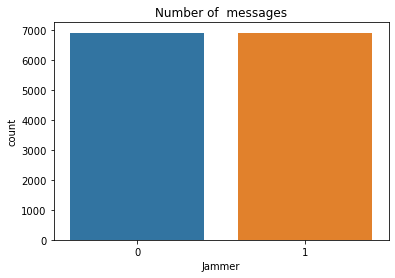

In [10]:
# 样本分布
# 以图方式表示
sns.countplot(data["Jammer"])
plt.xlabel("Jammer")
plt.title("Number of  messages")

In [11]:
# 重新排序
# df = data.sample(frac=1).reset_index(drop=True)

In [12]:
df = data

In [13]:
# 空值检查
# df[df.isnull().values==True]

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [16]:
# 数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(9679, 64)
(9679,)
(4149, 64)
(4149,)


In [18]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)


#数据的标准化
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)#各个成分方差值
print(sum(var_ratio))#成分方差总和

[[ 0.84130604  0.02147539 -0.28694251 ...  1.34219322  0.
   0.        ]
 [-1.12850485 -0.17456666  1.18882285 ...  0.03380605  0.
   0.        ]
 [-0.32152282 -0.17456666  1.09043849 ... -0.14185838  0.
   0.        ]
 ...
 [ 0.17304828 -0.10105089 -1.25513915 ...  1.87741726  0.
   0.        ]
 [-0.74672409  0.02147539 -0.0901738  ...  1.19395134  0.
   0.        ]
 [-1.0054059  -0.17456666  0.89366978 ...  0.25710829  0.
   0.        ]]
[2.33582878e+01 3.19763794e+00 2.99655572e+00 2.48980763e+00
 2.08104656e+00 1.91363061e+00 1.69588232e+00 1.56663635e+00
 1.49133202e+00 1.34442203e+00 1.18777165e+00 1.09014279e+00
 1.07410340e+00 1.01071245e+00 9.93805908e-01 8.71174123e-01
 8.47462780e-01 8.16820125e-01 7.23865251e-01 6.71048297e-01
 6.14051691e-01 5.79526838e-01 5.08950237e-01 4.75118092e-01
 4.61067527e-01 4.12436855e-01 3.86480377e-01 3.68294911e-01
 3.37046347e-01 3.25793927e-01 3.05741483e-01 2.79570586e-01
 2.68575673e-01 2.49421542e-01 2.31205188e-01 1.65537119e-01
 1.4701

(9679, 25) (9679, 64)
[[ 5.63643341 -3.15359511 -1.87771009 ... -0.00696859 -0.51005801
   0.71356001]
 [ 5.33954138 -0.40983437 -1.1468508  ...  0.39064473  0.34787804
  -0.36254703]
 [ 5.81305285 -3.20594239 -1.8704974  ... -0.24821376  0.81703886
  -0.68883653]
 ...
 [-4.12100491  0.65424935 -0.10702837 ... -0.31625215 -0.44631286
  -0.65053217]
 [-4.74433022 -0.15512321  2.49435963 ...  0.66683032 -0.86943048
   0.23551008]
 [-5.1368614  -2.02030619  1.76755974 ... -0.29621155 -0.99294906
  -0.14945851]]
(4149, 25)
[0.40268749 0.05512599 0.05165942 0.04292328 0.03587641 0.03299022
 0.02923633 0.02700818 0.02570996 0.0231773  0.0204767  0.01879362
 0.01851711 0.01742428 0.01713277 0.01501866 0.0146099  0.01408161
 0.01247908 0.01156857 0.01058586 0.00998962 0.00877397 0.0081845
 0.0079467 ]
<class 'numpy.ndarray'>
0.932


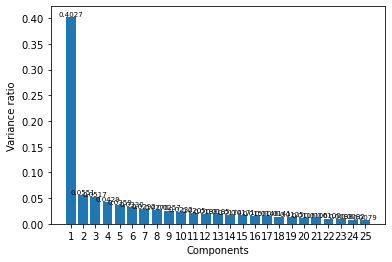

In [19]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

X_test_pca = pca.transform(X_test)

print(X_test_pca)
print(X_test_pca.shape)


# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

In [20]:
X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)
#X_test_pca = pca.fit_transform(X_test)

print(X_test_pca)
print(X_test_pca.shape)

[[ 5.91239024 -1.29655108 -3.36317926 ...  1.09957377 -0.26995628
   0.11552489]
 [ 5.61310494  0.56991336 -1.10766608 ... -0.43766912  0.06784538
   0.28314947]
 [ 6.11504568 -1.31008877 -3.46985722 ... -0.55288492  0.40064075
   0.09984818]
 ...
 [-3.92340293  0.67917718  0.23357309 ... -0.24339909 -0.88401446
   0.79180447]
 [-4.50867136 -1.59631791  1.81427316 ...  0.41778879 -0.6069777
   0.32676585]
 [-4.88364869 -2.64766425  0.05324892 ...  0.3879861  -0.99873188
   0.29377956]]
(4149, 25)


In [21]:
# 对数据处理
from keras.utils import np_utils

X_train = X_train_pca.reshape((-1,1,25))
Y_train = np_utils.to_categorical(y_train)
X_test = X_test_pca.reshape((-1,1,25))
Y_test = np_utils.to_categorical(y_test)


In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(9679, 1, 25)
(9679, 2)
(4149, 1, 25)
(4149, 2)


In [23]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten
from keras.layers.recurrent import GRU

model = Sequential()

model.add(GRU(units=50,return_sequences=True,input_shape=(1,25)))
#model.add(Dropout(0.75))

model.add(GRU(units=50,return_sequences=True))
#model.add(Dropout(0.75))

model.add(GRU(units=50,return_sequences=True))
#model.add(Dropout(0.75))

## model.add(LSTM(units=50,return_sequences=True))
## model.add(Dropout(0.2))

model.add(GRU(units=50))
#model.add(Dropout(0.75))

# model.add(Dense(units=256))
# model.add(Dropout(0.2))
model.add(Dense(units=64))
#model.add(Dropout(0.75))
model.add(Dense(units=16))
#model.add(Dropout(0.75))
model.add(Dense(units=8))
#model.add(Dropout(0.75))

model.add(Dense(units=2,activation="sigmoid"))

In [24]:
# Implement Learning rate decay
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

checkpoint = ModelCheckpoint("GRU.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta =0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1)
                              #min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [25]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
history_fit = model.fit(x=X_train, 
                        y=Y_train, 
                        batch_size=2, 
                        epochs=30, 
                        verbose=1, 
                        validation_data=(X_test, Y_test),
                        callbacks=callbacks)

Epoch 1/30
4840/4840 [==============================] - 16s 3ms/step - loss: 0.0656 - accuracy: 0.9737 - val_loss: 0.2054 - val_accuracy: 0.9342

Epoch 00001: val_loss improved from inf to 0.20537, saving model to GRU.h5
Epoch 2/30
4840/4840 [==============================] - 12s 2ms/step - loss: 0.0397 - accuracy: 0.9854 - val_loss: 0.2160 - val_accuracy: 0.9352

Epoch 00002: val_loss did not improve from 0.20537
Epoch 3/30
4840/4840 [==============================] - 12s 2ms/step - loss: 0.0316 - accuracy: 0.9888 - val_loss: 0.1851 - val_accuracy: 0.9395

Epoch 00003: val_loss improved from 0.20537 to 0.18513, saving model to GRU.h5
Epoch 4/30
4840/4840 [==============================] - 12s 2ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.3740 - val_accuracy: 0.9342

Epoch 00004: val_loss did not improve from 0.18513
Epoch 5/30
4840/4840 [==============================] - 12s 2ms/step - loss: 0.0223 - accuracy: 0.9918 - val_loss: 0.3114 - val_accuracy: 0.9409

Epoch 00005: v

In [27]:
# 画曲线
def plot_performance(history=None,figure_directory=None,ylim_pad=[0,0]):
    xlabel="Epoch"
    legends=["Training","Validation"]
    
    plt.figure(figsize=(20,5))
    
    y1=history.history["accuracy"]
    y2=history.history["val_accuracy"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[0]
    max_y=max(max(y1),max(y2))+ylim_pad[0]
    
    plt.subplot(121)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Accuracy\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    
    y1=history.history["loss"]
    y2=history.history["val_loss"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[1]
    max_y=max(max(y1),max(y2))+ylim_pad[1]
    
    plt.subplot(122)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Loss:\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Loss",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    plt.show()


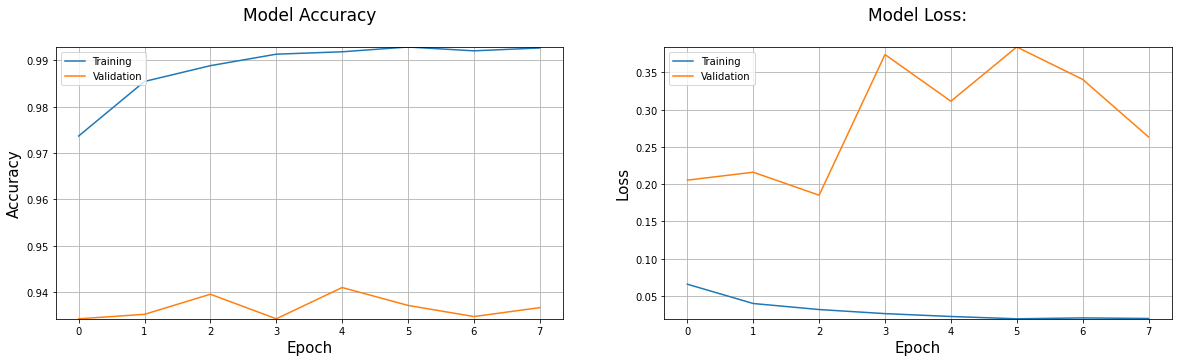

In [28]:
# 可视化
plot_performance(history=history_fit)


In [29]:
import warnings

warnings.filterwarnings("ignore")#忽略一些警告 不影响运行 

# 预测

# predict_y = (model.predict(X_test) > 0.5)*1 
# predict_y = np.around(predict_y) # np.around
predict_y = model.predict_classes(X_test)

In [30]:
predict_y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
y_test

9006     0
8574     0
13609    0
3044     1
13237    1
        ..
6038     0
8589     1
11797    1
3360     1
11463    1
Name: Jammer, Length: 4149, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test,predict_y,digits=4))


              precision    recall  f1-score   support

           0     0.9634    0.9105    0.9362      2022
           1     0.9191    0.9671    0.9425      2127

    accuracy                         0.9395      4149
   macro avg     0.9412    0.9388    0.9393      4149
weighted avg     0.9407    0.9395    0.9394      4149



In [33]:
from sklearn.metrics import confusion_matrix

a = confusion_matrix(predict_y, y_test)
print(a)

[[1841   70]
 [ 181 2057]]


In [34]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy_pca = accuracy_score(predict_y, y_test)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(predict_y, y_test)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(predict_y, y_test)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(predict_y, y_test)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

PCA测试集准确率: 0.9395


PCA测试集精确率: 0.9671


PCA测试集召回率: 0.9191


PCA测试集F1值: 0.9425


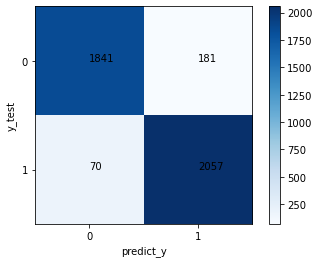

In [35]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(predict_y, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('predict_y')
plt.ylabel('y_test')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
 
plt.show()

[0 1]


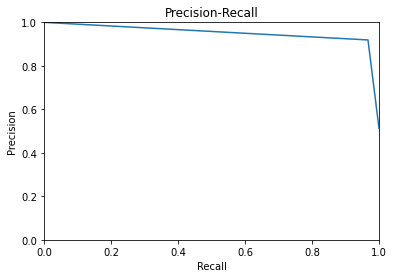

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, predict_y) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()

In [37]:
model

In [38]:
model.save('modelnew.h5')

In [39]:
from keras import models 
from keras.models import load_model


model = load_model('modelnew.h5')


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 50)             11550     
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 50)             15300     
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 50)             15300     
_________________________________________________________________
gru_3 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1